# Chicago Crime Data

Kristina DiBella-Silva

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## Load in Chicago Crime Data

In [2]:
# Load in combined CSV
df = pd.read_csv('Data/Chicago/crime_data_combined.csv.gz',lineterminator='\n')
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849,53.0,22260.0,7.0,403.0,4.0,60.0,24.0,268.0
1,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909,8.0,14920.0,33.0,4.0,26.0,43.0,15.0,121.0
2,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110,42.0,4450.0,20.0,53.0,27.0,50.0,11.0,52.0
3,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.945072,-87.684629,13.0,21538.0,46.0,646.0,18.0,39.0,5.0,21.0
4,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,41.756690,-87.561625,43.0,22538.0,39.0,245.0,37.0,24.0,19.0,225.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7854582 entries, 0 to 7854581
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Date                        object 
 1   Primary Type                object 
 2   Description                 object 
 3   Location Description        object 
 4   Arrest                      bool   
 5   Domestic                    bool   
 6   Beat                        int64  
 7   District                    float64
 8   Ward                        float64
 9   Latitude                    float64
 10  Longitude                   float64
 11  Historical Wards 2003-2015  float64
 12  Zip Codes                   float64
 13  Community Areas             float64
 14  Census Tracts               float64
 15  Wards                       float64
 16  Boundaries - ZIP Codes      float64
 17  Police Districts            float64
 18  Police Beats                float64
dtypes: bool(2), float64(1

In [4]:
# dataset shape
df.shape

(7854582, 19)

In [5]:
# Missing values
df.isna().sum()

Date                               0
Primary Type                       0
Description                        0
Location Description           10807
Arrest                             0
Domestic                           0
Beat                               0
District                          47
Ward                          614849
Latitude                       88235
Longitude                      88235
Historical Wards 2003-2015    111220
Zip Codes                      88235
Community Areas               108091
Census Tracts                 105993
Wards                         107972
Boundaries - ZIP Codes        108038
Police Districts              106913
Police Beats                  106889
dtype: int64

In [6]:
# dropping unnecessary columns
df = df.drop(columns = ['Latitude', 'Longitude'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7854582 entries, 0 to 7854581
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Date                        object 
 1   Primary Type                object 
 2   Description                 object 
 3   Location Description        object 
 4   Arrest                      bool   
 5   Domestic                    bool   
 6   Beat                        int64  
 7   District                    float64
 8   Ward                        float64
 9   Historical Wards 2003-2015  float64
 10  Zip Codes                   float64
 11  Community Areas             float64
 12  Census Tracts               float64
 13  Wards                       float64
 14  Boundaries - ZIP Codes      float64
 15  Police Districts            float64
 16  Police Beats                float64
dtypes: bool(2), float64(10), int64(1), object(4)
memory usage: 913.9+ MB


## Date to datetime

In [7]:
df.tail()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
7854577,07/24/2023 12:44:00 PM,NARCOTICS,POSSESS - CANNABIS 30 GRAMS OR LESS,VEHICLE NON-COMMERCIAL,False,False,1011,10.0,24.0,36.0,21569.0,30.0,33.0,14.0,57.0,21.0,155.0
7854578,07/24/2023 12:45:00 PM,BATTERY,SIMPLE,STREET,False,False,631,6.0,6.0,31.0,21546.0,40.0,406.0,32.0,61.0,20.0,235.0
7854579,07/24/2023 12:48:00 AM,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,ALLEY,False,False,522,5.0,9.0,45.0,21861.0,45.0,660.0,22.0,19.0,10.0,267.0
7854580,07/24/2023 12:53:00 AM,THEFT,$500 AND UNDER,STREET,False,True,2512,25.0,36.0,52.0,22615.0,19.0,77.0,44.0,2.0,6.0,183.0
7854581,07/24/2023 12:54:00 AM,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,2533,25.0,37.0,4.0,22615.0,26.0,523.0,45.0,5.0,6.0,195.0


In [8]:
test_date = df.loc[0, 'Date']
test_date

'01/01/2001 01:00:00 AM'

In [9]:
# convert dtype to datetime
fmt = '%m/%d/%Y %I:%M:%S %p'
df['Date'] = pd.to_datetime(df['Date'], format= fmt)

df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7854582 entries, 0 to 7854581
Data columns (total 17 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Date                        datetime64[ns]
 1   Primary Type                object        
 2   Description                 object        
 3   Location Description        object        
 4   Arrest                      bool          
 5   Domestic                    bool          
 6   Beat                        int64         
 7   District                    float64       
 8   Ward                        float64       
 9   Historical Wards 2003-2015  float64       
 10  Zip Codes                   float64       
 11  Community Areas             float64       
 12  Census Tracts               float64       
 13  Wards                       float64       
 14  Boundaries - ZIP Codes      float64       
 15  Police Districts            float64       
 16  Police Beats      

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,53.0,22260.0,7.0,403.0,4.0,60.0,24.0,268.0
1,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,8.0,14920.0,33.0,4.0,26.0,43.0,15.0,121.0


## Supplemental Data: Holiday Data

In [10]:
!pip install holidays

In [11]:
import holidays
import datetime as dt
from holidays import country_holidays

In [12]:
## making a date range that covers full dataset
all_days = pd.date_range(df['Date'].min(), df['Date'].max())
all_days


DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2023-07-15', '2023-07-16', '2023-07-17', '2023-07-18',
               '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-22',
               '2023-07-23', '2023-07-24'],
              dtype='datetime64[ns]', length=8240, freq='D')

In [13]:
# Getting General US Holidays
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [14]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2001-01-01 00:00:00


"New Year's Day"

In [15]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [16]:
# Getting Sub-Region Holidays
## For a specific subdivisions (e.g. state or province):
md_holidays = country_holidays('US', subdiv='MD')
md_holidays


holidays.country_holidays('US', subdiv='MD')

In [17]:
## Saving both holiday types as columns
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
df['MD Holiday'] = [md_holidays.get(day) for day in df['Date']]
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,US Holiday,MD Holiday
0,2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,53.0,22260.0,7.0,403.0,4.0,60.0,24.0,268.0,New Year's Day,New Year's Day
1,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,8.0,14920.0,33.0,4.0,26.0,43.0,15.0,121.0,New Year's Day,New Year's Day
2,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,42.0,4450.0,20.0,53.0,27.0,50.0,11.0,52.0,New Year's Day,New Year's Day
3,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,13.0,21538.0,46.0,646.0,18.0,39.0,5.0,21.0,New Year's Day,New Year's Day
4,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,43.0,22538.0,39.0,245.0,37.0,24.0,19.0,225.0,New Year's Day,New Year's Day


In [18]:
## US Holidays
df['US Holiday'].value_counts()

New Year's Day                                     33649
Independence Day                                   23475
Labor Day                                          22163
Memorial Day                                       21857
Columbus Day                                       20918
Veterans Day                                       20417
Martin Luther King Jr. Day                         18590
Washington's Birthday                              18227
Thanksgiving                                       14797
Christmas Day                                      12416
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
New Year's Day (Observed)                           5525
Christmas Day (Observed)                            4927
Juneteenth National Independence Day                2175
Juneteenth National Independence Day (Observed)     1402
Name: US Holiday, dtype: int64

In [19]:
## MD Holidays
df['MD Holiday'].value_counts()

New Year's Day                                             33649
Independence Day                                           23475
Labor Day                                                  22163
Memorial Day                                               21857
Columbus Day                                               20918
Veterans Day                                               20417
Washington's Birthday                                      18227
Martin Luther King Jr. Day                                 17925
Thanksgiving                                               14797
Christmas Day                                              12416
American Indian Heritage Day                               11219
Independence Day (Observed)                                 5884
Veterans Day (Observed)                                     5842
New Year's Day (Observed)                                   5525
Inauguration Day                                            5348
Christmas Day (Observed) 

In [20]:
## Saving a binary is holiday feature
df['Is_Holiday'] = df['US Holiday'].notna()
df['Is_Holiday'].value_counts()

False    7622318
True      232264
Name: Is_Holiday, dtype: int64

## Adding Month and Year Columns

In [21]:
import datetime as dt
# Month column
df['Month'] = df['Date'].dt.month_name()
# Day column
df['Year'] = df['Date'].dt.year

df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Historical Wards 2003-2015,...,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,US Holiday,MD Holiday,Is_Holiday,Month,Year
0,2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,53.0,...,403.0,4.0,60.0,24.0,268.0,New Year's Day,New Year's Day,True,January,2001
1,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,8.0,...,4.0,26.0,43.0,15.0,121.0,New Year's Day,New Year's Day,True,January,2001
2,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,42.0,...,53.0,27.0,50.0,11.0,52.0,New Year's Day,New Year's Day,True,January,2001
3,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,13.0,...,646.0,18.0,39.0,5.0,21.0,New Year's Day,New Year's Day,True,January,2001
4,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,43.0,...,245.0,37.0,24.0,19.0,225.0,New Year's Day,New Year's Day,True,January,2001


## Date column to Index

In [22]:
df = df.set_index('Date')
df.head(2)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Historical Wards 2003-2015,Zip Codes,...,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,US Holiday,MD Holiday,Is_Holiday,Month,Year
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,53.0,22260.0,...,403.0,4.0,60.0,24.0,268.0,New Year's Day,New Year's Day,True,January,2001
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,8.0,14920.0,...,4.0,26.0,43.0,15.0,121.0,New Year's Day,New Year's Day,True,January,2001


## Exploring Crime Columns

In [50]:
df['Description'].nunique()

546

In [51]:
df['Primary Type'].nunique()

36

In [52]:
df['Primary Type'].value_counts()

THEFT                                1657240
BATTERY                              1435085
CRIMINAL DAMAGE                       895411
NARCOTICS                             748869
ASSAULT                               513480
OTHER OFFENSE                         487669
BURGLARY                              426309
MOTOR VEHICLE THEFT                   383123
DECEPTIVE PRACTICE                    349651
ROBBERY                               294917
CRIMINAL TRESPASS                     215481
WEAPONS VIOLATION                     108895
PROSTITUTION                           69894
OFFENSE INVOLVING CHILDREN             56292
PUBLIC PEACE VIOLATION                 52560
SEX OFFENSE                            31071
CRIM SEXUAL ASSAULT                    27604
INTERFERENCE WITH PUBLIC OFFICER       18525
LIQUOR LAW VIOLATION                   14955
GAMBLING                               14621
ARSON                                  13398
HOMICIDE                               12746
KIDNAPPING

In [60]:
# Correct Entries
df['Primary Type'] = df['Primary Type'].replace('NON-CRIMINAL (SUBJECT SPECIFIED)','NON-CRIMINAL')
df['Primary Type'] = df['Primary Type'].replace('NON - CRIMINAL','NON-CRIMINAL')
df['Primary Type'] = df['Primary Type'].replace('OTHER NARCOTIC VIOLATION','NARCOTICS')
df['Primary Type'] = df['Primary Type'].replace('CRIM SEXUAL ASSAULT','CRIMINAL SEXUAL ASSAULT')
df['Primary Type'] = df['Primary Type'].replace('CONCEALED CARRY LICENSE VIOLATION','WEAPONS VIOLATION')
# Confirm corrections
df['Primary Type'].value_counts()

THEFT                               1657240
BATTERY                             1435085
CRIMINAL DAMAGE                      895411
NARCOTICS                            749018
ASSAULT                              513480
OTHER OFFENSE                        487669
BURGLARY                             426309
MOTOR VEHICLE THEFT                  383123
DECEPTIVE PRACTICE                   349651
ROBBERY                              294917
CRIMINAL TRESPASS                    215481
WEAPONS VIOLATION                    110023
PROSTITUTION                          69894
OFFENSE INVOLVING CHILDREN            56292
PUBLIC PEACE VIOLATION                52560
CRIMINAL SEXUAL ASSAULT               34795
SEX OFFENSE                           31071
INTERFERENCE WITH PUBLIC OFFICER      18525
LIQUOR LAW VIOLATION                  14955
GAMBLING                              14621
ARSON                                 13398
HOMICIDE                              12746
KIDNAPPING                      

In [61]:
df['Primary Type'].nunique()

31

## Resample Dataframe
- A resampled/converted crime counts version (Each row is 1 day)

In [31]:
# copy df
day_df = df.copy()
day_df.head(2)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Historical Wards 2003-2015,Zip Codes,...,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,US Holiday,MD Holiday,Is_Holiday,Month,Year,Crime Count
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,53.0,22260.0,...,4.0,60.0,24.0,268.0,New Year's Day,New Year's Day,True,January,2001,7854582
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,8.0,14920.0,...,26.0,43.0,15.0,121.0,New Year's Day,New Year's Day,True,January,2001,7854582


In [32]:
ts_day_res = day_df.resample("D").size()
ts_day_res.name = 'Resampled'
ts_day_res.head()

Date
2001-01-01    1825
2001-01-02    1143
2001-01-03    1151
2001-01-04    1166
2001-01-05    1267
Freq: D, Name: Resampled, dtype: int64

# Task
Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

- Stakeholder Questions to Answer (pick at least 3 topics) Select 3 or more of the following topics to analyze:

## Topic 1) Comparing Police Districts:
- Which district has the most crimes? Which has the least?

In [29]:
df['District'].value_counts()

8.0     527578
11.0    503734
6.0     459385
7.0     453398
25.0    446623
4.0     445978
3.0     398342
12.0    389724
9.0     383523
2.0     372167
19.0    353115
18.0    352699
5.0     347779
10.0    338469
15.0    336060
1.0     318302
14.0    303720
16.0    263084
22.0    257330
24.0    237551
17.0    226668
20.0    139056
31.0       246
21.0         4
Name: District, dtype: int64

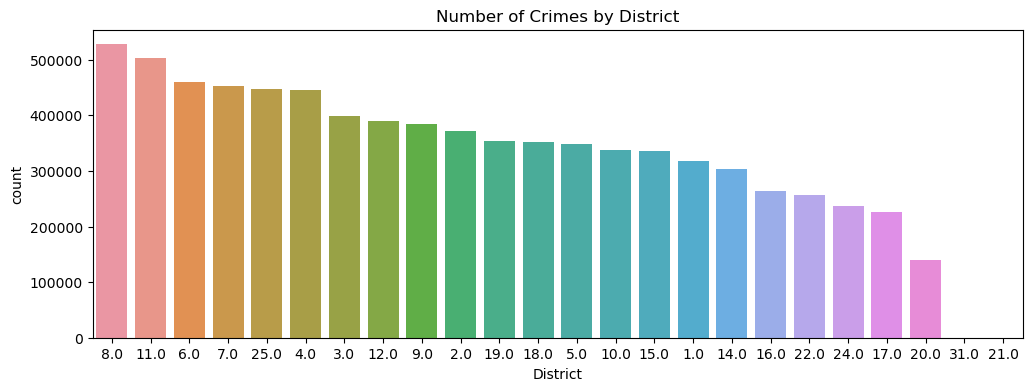

In [33]:
# countplot  in decending order
ax = sns.countplot(data = df, x= 'District', order=df['District'].value_counts().index)
# rotate x labels
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
# title
ax.set_title('Number of Crimes by District');

- District 8.0 has the highest amount of crime 
- District 21.0 has the leave amount of crime. 

## Topic 2) Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [62]:
# Get number of crimes by Year
crimes_by_year = df.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_by_year

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2019    6556
                   2020    8580
                   2021    9153
                   2022    8943
                   2023    5099
Name: Year, Length: 657, dtype: int64

In [55]:
## convert to dataframe and reset_index()
plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Year,# of Crimes
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
663,WEAPONS VIOLATION,2019,6339
664,WEAPONS VIOLATION,2020,8432
665,WEAPONS VIOLATION,2021,8980
666,WEAPONS VIOLATION,2022,8766


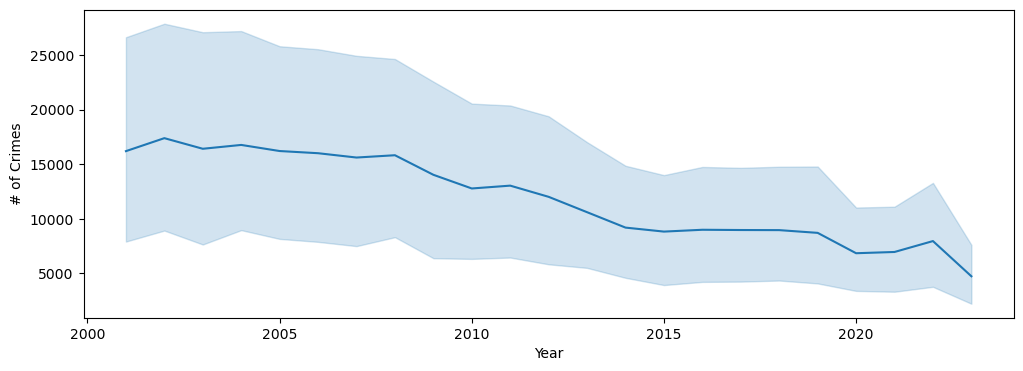

In [63]:
ax = sns.lineplot(data=plot_df, x='Year', y='# of Crimes')


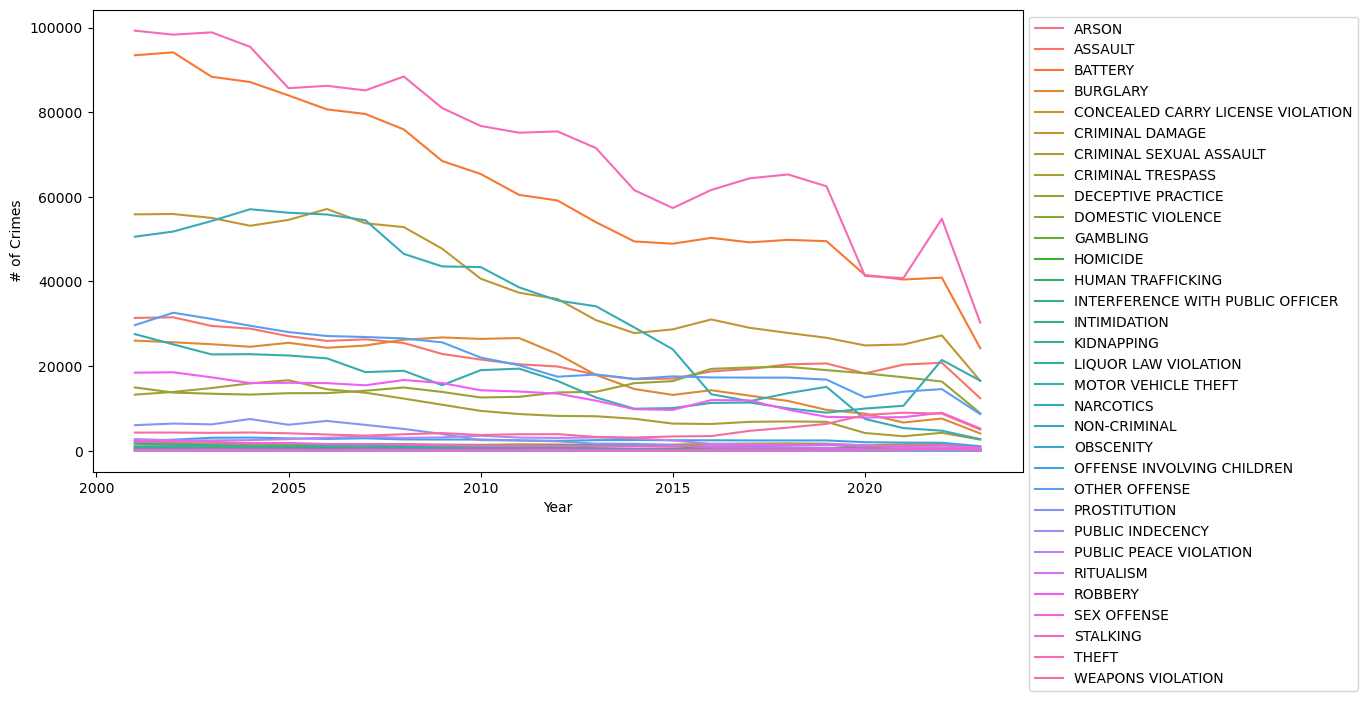

In [64]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=plot_df, x='Year',y= '# of Crimes',markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);


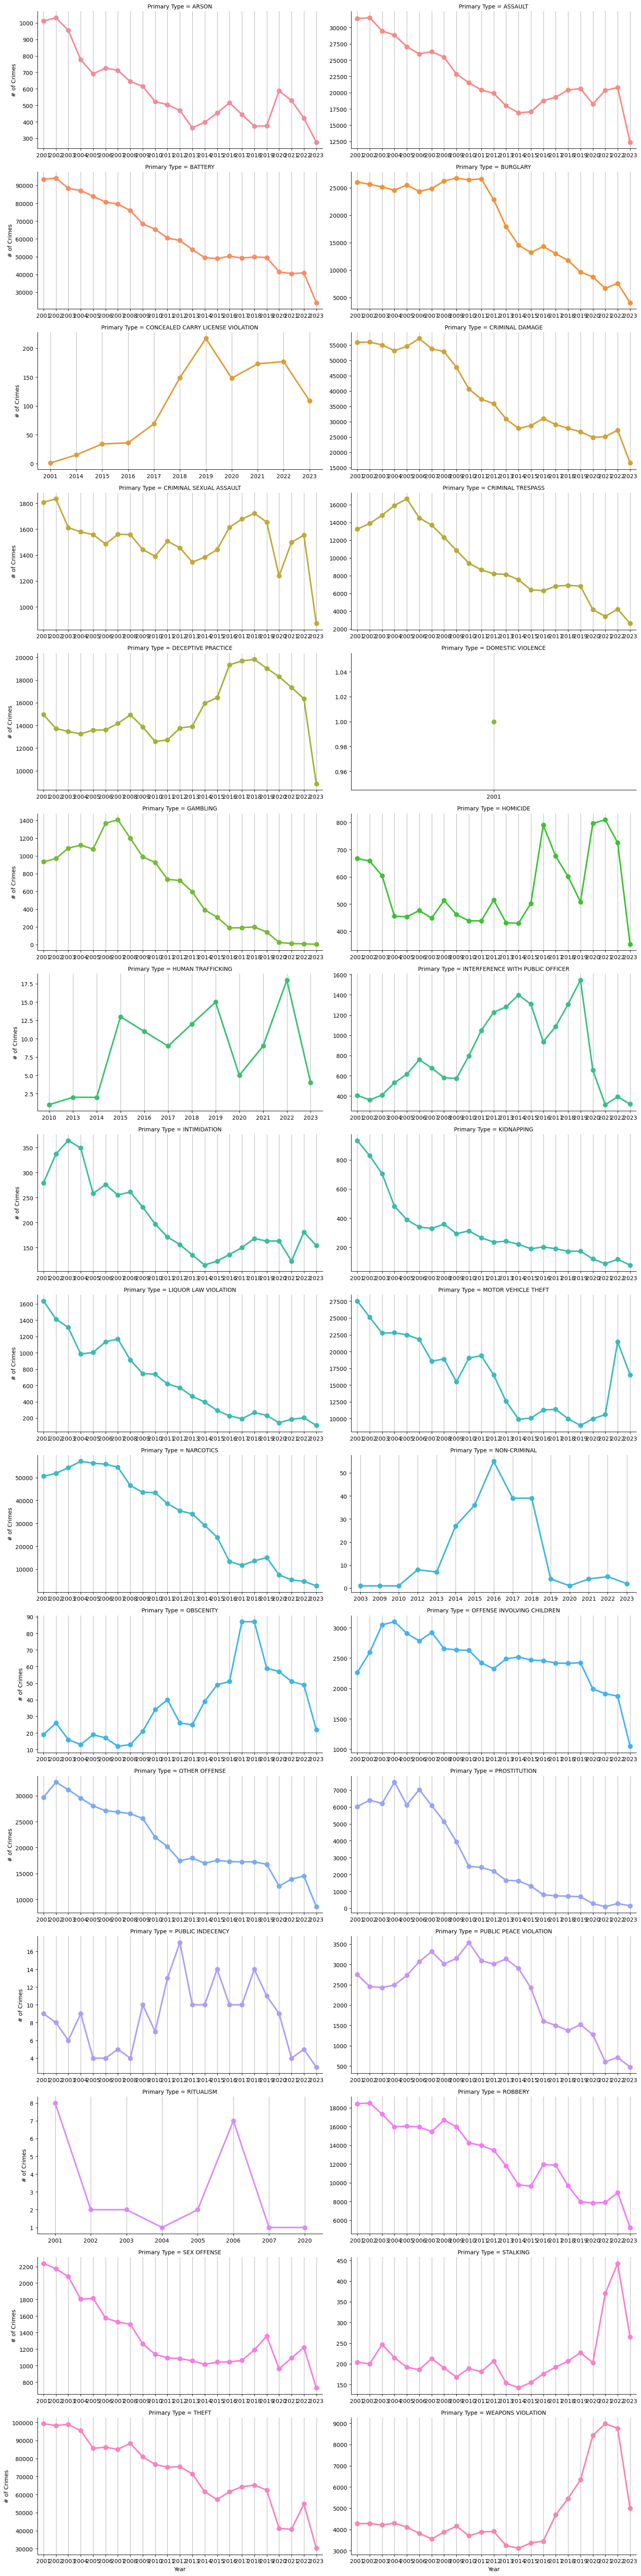

In [65]:
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];



- Crime appears to decrease as the years continue.
- All crimes have been decreasing.
- Motor Vehicle Theft look to have increased around 2020 with a greater increase in  2022 and then decrease for 2023.

## Topic 4) Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [69]:
# Get number of crimes by Year
crimes_by_mon = df.groupby('Primary Type')['Month'].value_counts().sort_index()
crimes_by_mon

Primary Type       Month    
ARSON              April         1134
                   August        1182
                   December       923
                   February       840
                   January        963
                                ...  
WEAPONS VIOLATION  March         8895
                   May          10864
                   November      8025
                   October       9289
                   September     9553
Name: Month, Length: 360, dtype: int64

In [71]:
## convert to dataframe and reset_index()
plot_df_mon = crimes_by_mon.to_frame('# of Crimes').reset_index()
plot_df_mon

,Primary Type,Month,# of Crimes
0,ARSON,April,1134
1,ARSON,August,1182
2,ARSON,December,923
3,ARSON,February,840
4,ARSON,January,963
...,...,...,...
355,WEAPONS VIOLATION,March,8895
356,WEAPONS VIOLATION,May,10864
357,WEAPONS VIOLATION,November,8025
358,WEAPONS VIOLATION,October,9289


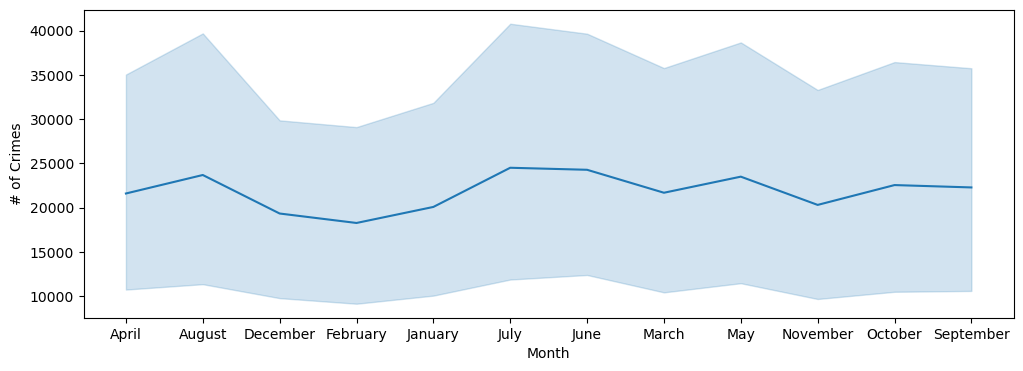

In [73]:
ax = sns.lineplot(data=plot_df_mon, x='Month', y='# of Crimes')


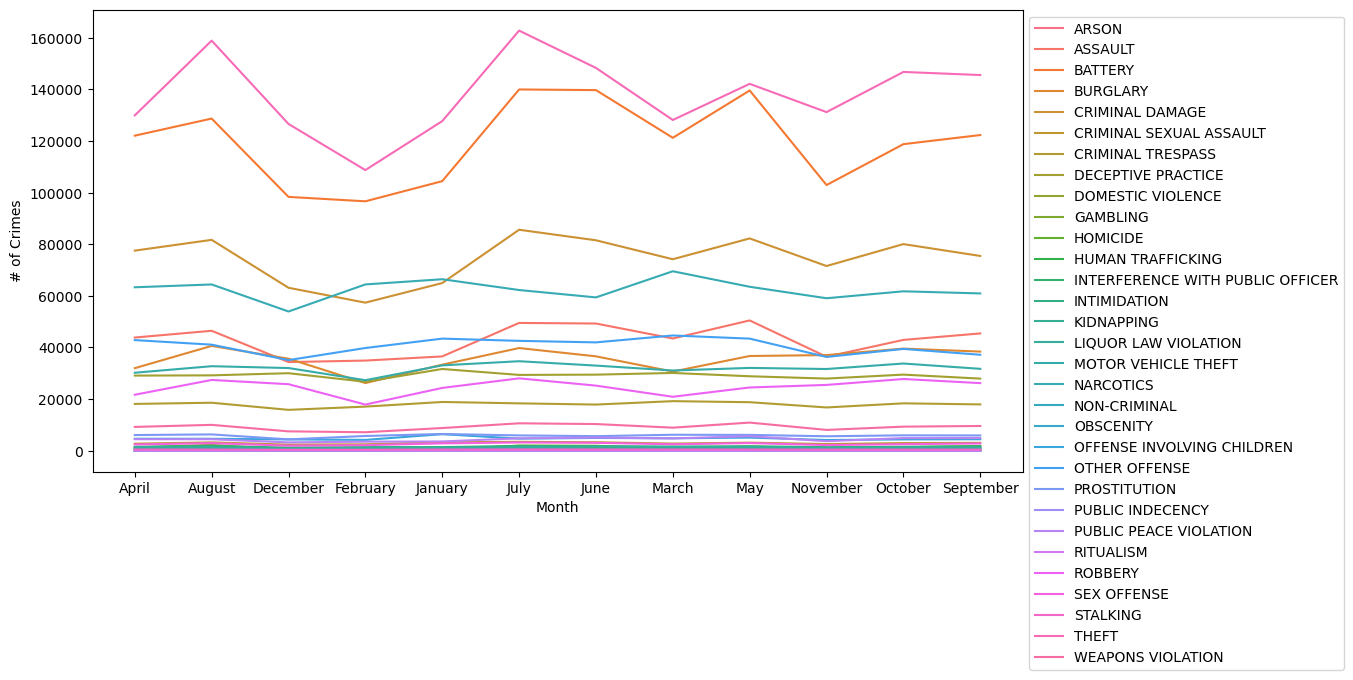

In [74]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=plot_df, x='Month',y= '# of Crimes',markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);


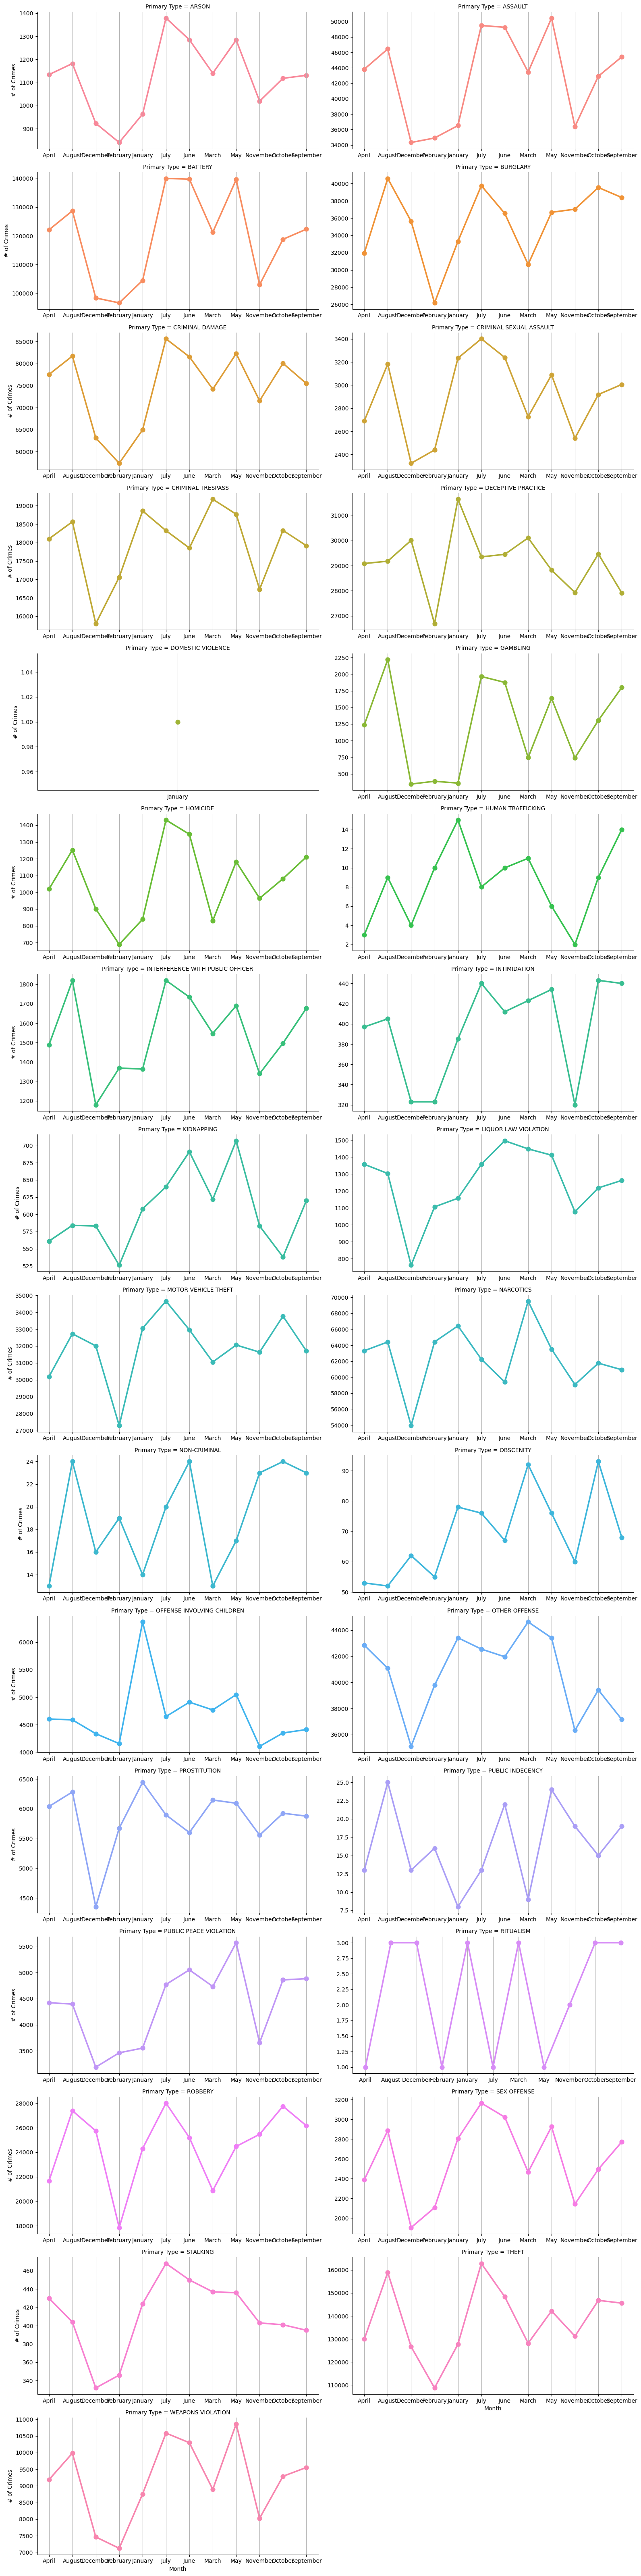

In [92]:
g = sns.catplot(data=plot_df, x='Month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];



- What months have the most crime? What months have the least?
Are there any individual crimes that do not follow this pattern? If so, which crimes

## Topic 5) Comparing Holidays:
- Are there any holidays that show an increase in the # of crimes?
- Are there any holidays that show a decrease in the # of crimes?

In [91]:
df['US Holiday'].value_counts()

New Year's Day                                     33649
Independence Day                                   23475
Labor Day                                          22163
Memorial Day                                       21857
Columbus Day                                       20918
Veterans Day                                       20417
Martin Luther King Jr. Day                         18590
Washington's Birthday                              18227
Thanksgiving                                       14797
Christmas Day                                      12416
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
New Year's Day (Observed)                           5525
Christmas Day (Observed)                            4927
Juneteenth National Independence Day                2175
Juneteenth National Independence Day (Observed)     1402
Name: US Holiday, dtype: int64

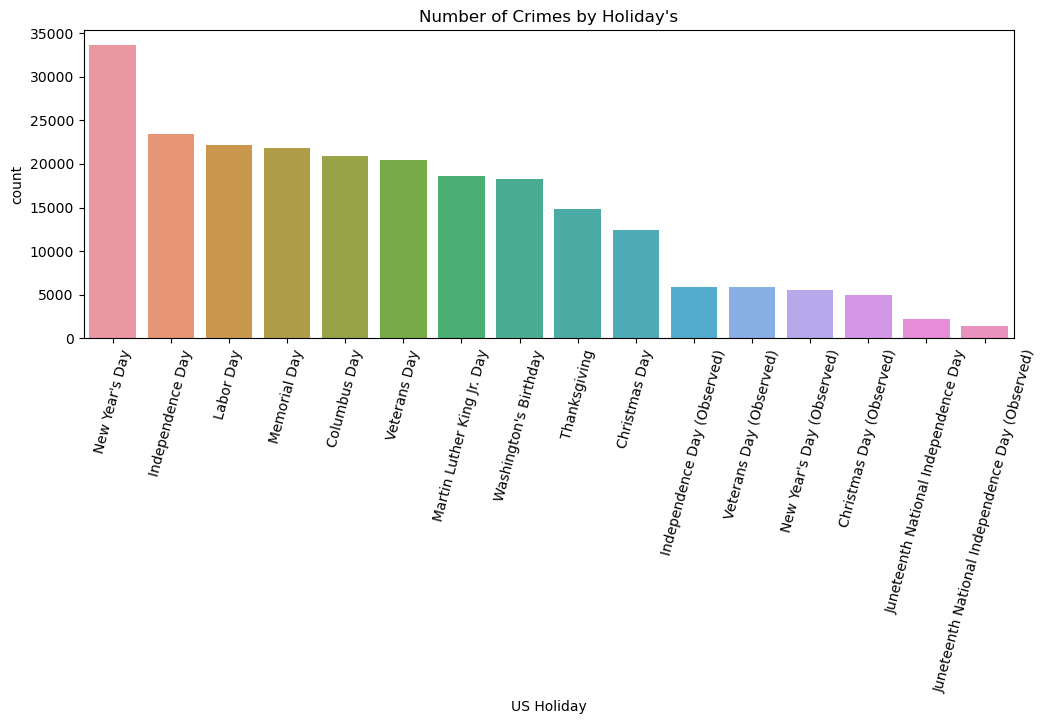

In [83]:
# countplot in decending order
ax = sns.countplot(data = df, x= 'US Holiday', order=df['US Holiday'].value_counts().index)
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
# title
ax.set_title("Number of Crimes by Holiday's");

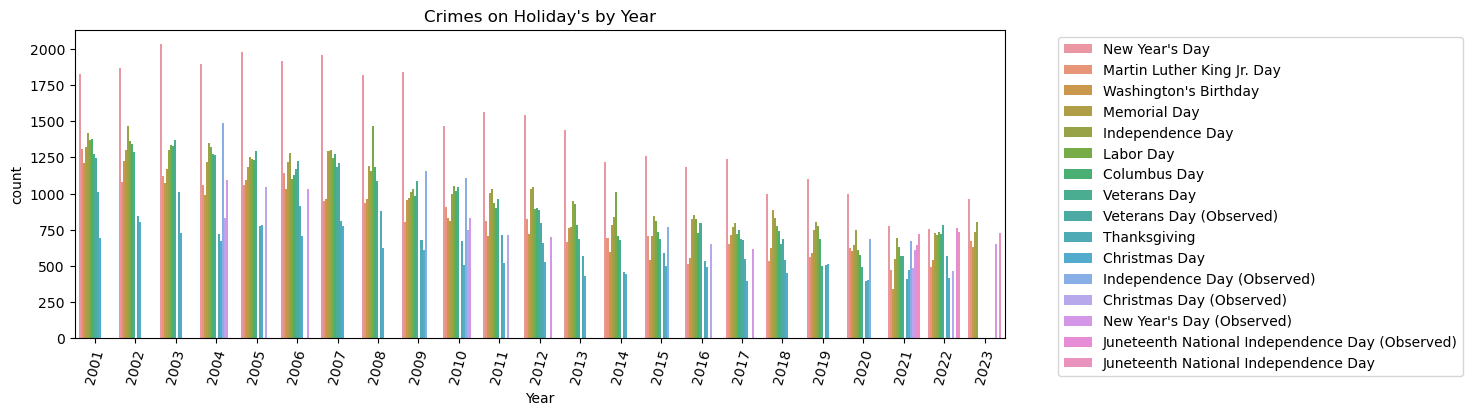

In [89]:
# countplot in decending order
ax = sns.countplot(data = df, x= 'Year', hue = 'US Holiday')
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# title
ax.set_title("Crimes on Holiday's by Year");

- New Yea